In [8]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
import math
import itertools
%matplotlib inline

## 1.1 Mathematical Derivation

Assume that we have $X=\begin{bmatrix}  
	\mathbf x_{1}&\mathbf x_{2}&\cdots&\mathbf x_{N}
\end{bmatrix}\in \mathbb{R}^{M\times N}$ and $t_{1},\cdots,t_{N}\in\{-1,1\}$ as our input data and targets. On top of that, our ultimate goal is to $\textbf{maximize the margin} $.

We will start with $\textbf{hard margin} $ (i.e. linearly separable data) and $\textbf{linear kernel} $. Since the data is linearly separable, we have at least one choice of $\mathbf w$ and $b$ such that $y(\mathbf x_{i})>0$ for $t_{i}=1$ and $y(\mathbf x_{i})<0$ for $t_{i}=-1$. In another word, $t_{i}y(\mathbf x_{i})>0,\, \forall i$ where $y(\mathbf x_{i}) = \mathbf w\cdot\mathbf x_{i}+b$. Notice that by scaling $\mathbf w$ and $b$, we can easily manipulate the inequalities into $t_{i}y(x_{i})\geq 1,\, \forall i$.

Now, recall that the distance between a point $\mathbf x_{i}$ and a hyperplane $\mathbf w\cdot \mathbf x+b=0$ can be expressed as follows:

\begin{align*}
	d&=\|proj_{\mathbf w}(\mathbf x_{i}-\mathbf x^{*})\| = \left \|\frac{(\mathbf x_{i}-\mathbf x^{*})\cdot \mathbf w}{\mathbf w\mathbf w}\cdot \mathbf w\right \| = \|\mathbf x_{i} \cdot\mathbf w-\mathbf x^{*} \cdot\mathbf w\| \cdot \frac{\|\mathbf w\|}{\|\mathbf w\|^{2}} = \frac{\|\mathbf w\cdot\mathbf x_{i}+b\|}{\|\mathbf w\|}
\end{align*}

where $\mathbf x^{*}$ is a point on the hyperplane such that $\mathbf x_{i}-\mathbf x^{*}$ is perpendicular to the hyperplane.

Therefore, the maximum margin solution is found by solving $arg\max_{\mathbf w,b} \left \{\frac{1}{\|\mathbf w\|}\min_{i}\big[t_{i}(\mathbf w^{T}\mathbf x_{i}+b)\big]\right \}$.

As stated before, we have the constraint that $t_{i}y(x_{i}) = t_{i}(\mathbf w^{T}\mathbf x_{i}+b) \geq 1$ and thus, our objective function becomes

\begin{align*}
	\min \frac{1}{\|\mathbf w\|} \hspace{10mm}\text{ such that } \hspace{10mm}t_{i}y(x_{i})\geq 1
\end{align*}

which is equivalent to 

\begin{align*}
	\max \frac{1}{2}\|\mathbf w\|^{2} \hspace{10mm}\text{ such that } \hspace{10mm}t_{i}y(x_{i})\geq 1	
\end{align*}

Now, by introducing the $\textbf{Lagrange Multiplier } \alpha_{i}$ for every constraints, we have the following:

\begin{align*}
	\mathcal L = \frac{1}{2}\|\mathbf w\|^{2} - \sum_{i=1}^{N}\alpha_{i}\big[t_{i}(\mathbf w\cdot \mathbf x_{i}+b)-1\big]
\end{align*}

Taking derive with respect to $ \mathbf w $ and $b$ and setting derivatives to zero gives us:

\begin{align*}
	\mathbf w &= \sum_{i=1}^{N}\alpha_{i}t_{i}\mathbf x_{i}\\
	\sum_{i=1}^{N} \alpha_{i}t_{i} &= 0
\end{align*}

Now, plugging it back to $\mathcal L$ gives us:

\begin{align*}
	\mathcal L &= \frac{1}{2}\|\mathbf w\|^{2} - \sum_{i=1}^{N}\alpha_{i}\big[t_{i}(\mathbf w\cdot \mathbf x_{i}+b)-1\big]\\
	&= \frac{1}{2}\left (\sum_{i=1}^{N}\alpha_{i}t_{i}\mathbf x_{i}\right )\left (\sum_{j=1}^{N}\alpha_{j}t_{j}\mathbf x_{j}\right ) - \sum_{i=1}^{N}\alpha_{i}t_{i}\mathbf w\cdot \mathbf x_{i}-\sum_{i=1}^{N}\alpha_{i}t_{i}b+\sum_{i=1}^{N}\alpha_{i}\\
	&= \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_{i}\alpha_{j}t_{i}t_{j}\mathbf x_{i}\cdot \mathbf x_{j} - \sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_{i}\alpha_{j}t_{i}t_{j}\mathbf x_{i}\cdot\mathbf x_{j} - 0 + \sum_{i=1}^{N} \alpha_{i}\\
	&= \sum_{i=1}^{N} \alpha_{i}- \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_{i}\alpha_{j}t_{i}t_{j}\mathbf x_{i}\cdot \mathbf x_{j} 
\end{align*}

Thus, our objective function now becomes:

\begin{align*}
	\max_{\alpha} \sum_{i=1}^{N} \alpha_{i}- \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_{i}\alpha_{j}t_{i}t_{j}\mathbf x_{i}\cdot\mathbf x_{j}\hspace{10mm}\text{ such that } \hspace{10mm}\alpha_{i}\geq 0,\, \sum_{i=1}^{N}\alpha_{i}t_{i} = 0
\end{align*}

Now, we will introducing $\textbf{Non-linear Kernel}$ and $\textbf{Soft-margin SVM}$ to our objective function.

* For $\textbf{Non-linear Kernel}$, we can simply replace $\mathbf x_{i}\cdot \mathbf x_{j}$ with $k(\mathbf x_{i}, \mathbf x_{j})$.

* For $\textbf{Soft-margin SVM}$, we need to add slack variables $z_{1},\cdots,z_{N}$ from the beginning. More precisely, our original objective function will become:

\begin{align*}
	\min \frac{1}{\|\mathbf w\|}+C\cdot \sum_{i=1}^{N}z_{i}\hspace{10mm}\text{ such that } \hspace{10mm}t_{i}y(x_{i})\geq 1-z_{i}
\end{align*}

And after some calculation, we will end up with the following:

\begin{align*}
	\max_{\alpha} \sum_{i=1}^{N} \alpha_{i}- \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} \alpha_{i}\alpha_{j}t_{i}t_{j}k(\mathbf x_{i},\mathbf x_{j}) \hspace{10mm}\text{ such that } \hspace{10mm} 0\leq \alpha_{i}\leq C,\, \sum_{i=1}^{N}\alpha_{i}t_{i} = 0
\end{align*}

At last, in order to use the $\textit{cvxopt} $ library, we must convert our objective function into the following form:

\begin{align*}
	\min_{\mathbf a}\frac{1}{2}\mathbf a^{T}P \mathbf a+  \mathbf q^{T}\mathbf a \hspace{10mm}\text{ such that } \hspace{10mm}G\mathbf a \leq \mathbf h \text{ and }A\mathbf a=\mathbf b
\end{align*}

Thus, by manipulating our objective function, we will have the following

\begin{align*}
	\mathbf a &= \begin{bmatrix}  
		\alpha_{1}&\cdots&\alpha_{N}
	\end{bmatrix}^{T}\\
	P &= \mathbf t k(\mathbf x_{i}, \mathbf x_{j}) \mathbf t^{T}\\
	\mathbf q &= -\mathbb 1\in \mathbb{R}^{N}\\
	G &= \begin{bmatrix}  
		diag(-\mathbb 1)\\
		diag(\mathbb 1)
	\end{bmatrix} \in \mathbb{R}^{2N\times N}\\
	\mathbf h &= \begin{bmatrix}
		\mathbb O\\
		\mathbb C\\
	\end{bmatrix}\in\mathbb{R}^{2N}\\
	A &= \mathbf t^{T}\\
	\mathbf b &= 0
\end{align*}


## 1.2 Implementation

In [21]:
class Kernel(object):
    @staticmethod
    def linear():
        return lambda x, y: np.inner(x, y)

    @staticmethod
    def gaussian(sigma):
        return lambda x, y: np.exp(-np.sqrt(np.linalg.norm(x-y) ** 2 / (2 * sigma ** 2)))

In [48]:
import cvxopt.solvers
# multiplier larger than this value will be treated as non-zero
MIN_SUPPORT_VECTOR_MULTIPLIER = 1e-5 

class SVM(object):
    def __init__(self, kernel, C):
        # for training
        self.kernel = kernel
        self.C = C
        # for predicting
        self.bias = None
        self.weights = None
        self.support_vectors = None
        self.support_vector_labels = None

    def train(self, X, y):
        """Given the training features X with labels y, returns a SVM
        predictor representing the trained SVM.
        """
        lagrange_multipliers = self._compute_multipliers(X, y)
        support_vector_indices = lagrange_multipliers > MIN_SUPPORT_VECTOR_MULTIPLIER
        
        # we will calculate bias term later
        # according to http://www.cs.cmu.edu/~guestrin/Class/10701-S07/Slides/kernels.pdf
        # we should have bias = y_k - \sum z_i y_i  K(x_k, x_i)
        self.bias = 0.0
        self.weights = lagrange_multipliers[support_vector_indices]
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]
        self.bias = np.mean([y_k - self.predict(x_k) for (y_k, x_k) in zip(self.support_vector_labels, self.support_vectors)])
        
    def predict(self, x):
        """
        Computes the SVM prediction on the given features x.
        """
        result = self.bias
        for z_i, x_i, y_i in zip(self.weights, self.support_vectors, self.support_vector_labels):
            result += z_i * y_i * self.kernel(x_i, x)
        return np.sign(result).item()

    def _gram_matrix(self, X):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))

        for i, x_i in enumerate(X):
            for j, x_j in enumerate(X):
                K[i, j] = self.kernel(x_i, x_j)
        return K

    def _compute_multipliers(self, X, y):
        n_samples, n_features = X.shape
        K = self._gram_matrix(X)
        
        # we will use the formula we derived eariler
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-1 * np.ones(n_samples))

        G_std = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        h_std = cvxopt.matrix(np.zeros(n_samples))

        G_slack = cvxopt.matrix(np.diag(np.ones(n_samples)))
        h_slack = cvxopt.matrix(np.ones(n_samples) * self.C)

        G = cvxopt.matrix(np.vstack((G_std, G_slack)))
        h = cvxopt.matrix(np.vstack((h_std, h_slack)))

        A = cvxopt.matrix(y, (1, n_samples))
        b = cvxopt.matrix(0.0)

        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        return np.ravel(solution['x'])

## 1.3 Examples

In [57]:
def plot(svm, X, y, grid_size):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                         np.linspace(y_min, y_max, grid_size),
                         indexing='ij')
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(svm.predict(point))

    Z = np.array(result).reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 cmap=cm.Paired,
                 levels=[-0.001, 0.001],
                 extend='both',
                 alpha=0.8)
    
    x1 = flatten(X[:, 0])
    x2 = flatten(X[:, 1])
    y = flatten(y)
    plt.scatter(x1[y<0], x2[y<0], marker="x")
    plt.scatter(x1[y>0], x2[y>0], marker="o")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [92]:
def example(num_samples=10, num_features=2, grid_size=20, kernel=Kernel.linear()):
    samples = np.matrix(np.random.normal(size=num_samples * num_features).reshape(num_samples, num_features))
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    # add some noise to test soft-margin
    noise = np.matrix(np.random.normal(size=num_samples * num_features).reshape(num_samples, num_features))*0.2
    samples += noise
    
    svm = SVM(kernel, 0.1)
    svm.train(samples, labels)
    plot(svm, samples, labels, grid_size)

     pcost       dcost       gap    pres   dres
 0: -9.1406e+00 -9.3269e+00  3e+02  2e+01  7e-16
 1: -1.7893e+00 -8.7804e+00  1e+01  5e-01  6e-16
 2: -1.5820e+00 -3.3595e+00  2e+00  1e-16  3e-16
 3: -1.9361e+00 -2.2194e+00  3e-01  1e-16  3e-16
 4: -2.0486e+00 -2.0929e+00  4e-02  1e-16  2e-16
 5: -2.0640e+00 -2.0727e+00  9e-03  1e-16  2e-16
 6: -2.0678e+00 -2.0693e+00  2e-03  1e-16  3e-16
 7: -2.0685e+00 -2.0685e+00  2e-05  2e-16  3e-16
 8: -2.0685e+00 -2.0685e+00  2e-07  2e-16  3e-16
Optimal solution found.


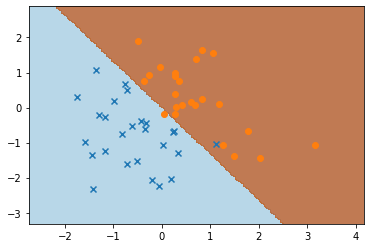

In [93]:
example(num_samples=50, grid_size=128)

     pcost       dcost       gap    pres   dres
 0: -1.1872e+01 -1.2192e+01  2e+02  1e+01  3e-16
 1: -5.1228e+00 -9.8779e+00  1e+01  4e-01  5e-16
 2: -4.2739e+00 -5.4290e+00  1e+00  2e-16  7e-16
 3: -4.5395e+00 -4.5624e+00  2e-02  3e-16  3e-16
 4: -4.5520e+00 -4.5522e+00  2e-04  2e-16  4e-16
 5: -4.5521e+00 -4.5521e+00  2e-06  1e-16  3e-16
Optimal solution found.


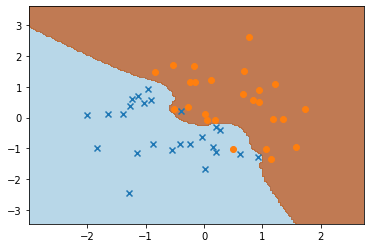

In [94]:
example(num_samples=50, grid_size=128, kernel=Kernel.gaussian(0.2))

     pcost       dcost       gap    pres   dres
 0: -7.6258e+00 -1.1020e+01  2e+02  1e+01  3e-16
 1: -4.2691e+00 -9.4753e+00  1e+01  5e-01  4e-16
 2: -3.5433e+00 -5.0179e+00  1e+00  2e-16  7e-16
 3: -3.6521e+00 -3.9311e+00  3e-01  1e-16  4e-16
 4: -3.7015e+00 -3.7371e+00  4e-02  1e-16  4e-16
 5: -3.7138e+00 -3.7175e+00  4e-03  1e-16  4e-16
 6: -3.7155e+00 -3.7157e+00  2e-04  2e-16  4e-16
 7: -3.7156e+00 -3.7156e+00  9e-06  1e-16  3e-16
 8: -3.7156e+00 -3.7156e+00  7e-07  1e-16  3e-16
Optimal solution found.


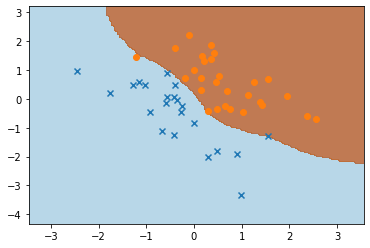

In [95]:
example(num_samples=50, grid_size=128, kernel=Kernel.gaussian(1))